In [47]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud

In [2]:
f = open("data.txt", "r", encoding = "ISO-8859-1")

In [3]:
text = f.read()

In [4]:
text[:1000]

"The Project Gutenberg EBook of Man to Man, by Jackson Gregory\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Man to Man\n\nAuthor: Jackson Gregory\n\nRelease Date: July 29, 2006 [EBook #18933]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK MAN TO MAN ***\n\n\n\n\nProduced by Al Haines\n\n\n\n\n\n\n\n\n\n\n[Frontispiece: The blazing heat was such that men and horses and steers\nsuffered terribly.]\n\n\n\n\n\n\nMAN TO MAN\n\n\nBY\n\nJACKSON GREGORY\n\n\n\nAUTHOR OF\n\nJUDITH OF BLUE LAKE RANCH, THE BELLS OF SAN JUAN, SIX FEET FOUR, ETC.\n\n\n\n\nILLUSTRATED BY\n\nJ. G. SHEPHERD\n\n\n\n\n\nGROSSET & DUNLAP\n\nPUBLISHERS -------- NEW YORK\n\n\n\n\nCOPYRIGHT, 1920, BY\n\nCHARLES SCRIBNER'S SONS\n\n\nPublished October, 1920\n\n\n\n\nCONTENTS\n\n\nCHAPTER

In [5]:
len(text)

436574

In [6]:
sentences = sent_tokenize(text.lower())

In [7]:
len(sentences)

5551

In [8]:
sentences[:2]

['the project gutenberg ebook of man to man, by jackson gregory\n\nthis ebook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.',
 'you may copy it, give it away or\nre-use it under the terms of the project gutenberg license included\nwith this ebook or online at www.gutenberg.org\n\n\ntitle: man to man\n\nauthor: jackson gregory\n\nrelease date: july 29, 2006 [ebook #18933]\n\nlanguage: english\n\n\n*** start of this project gutenberg ebook man to man ***\n\n\n\n\nproduced by al haines\n\n\n\n\n\n\n\n\n\n\n[frontispiece: the blazing heat was such that men and horses and steers\nsuffered terribly.]']

In [9]:
corpus = word_tokenize(text)

In [10]:
len(corpus)

97071

In [11]:
corpus[:15]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Man',
 'to',
 'Man',
 ',',
 'by',
 'Jackson',
 'Gregory',
 'This',
 'eBook',
 'is']

In [12]:
corpus_alt = text.lower().split()

In [13]:
corpus_alt[:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'man',
 'to',
 'man,',
 'by',
 'jackson']

In [14]:
len(corpus_alt)

78078

In [15]:
# Remove punctuation and numbers

In [16]:
corpus_1 = [w for w in corpus if w.isalpha()]

In [17]:
corpus_1[:10]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Man',
 'to',
 'Man',
 'by',
 'Jackson']

In [18]:
# Removing stopwords

In [19]:
stop_words = stopwords.words("english")

In [20]:
corpus_2 = [w for w in corpus_1 if w not in stop_words]

In [21]:
len(corpus_2)

42688

In [22]:
corpus_2[:10]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'Man',
 'Man',
 'Jackson',
 'Gregory',
 'This',
 'eBook']

In [23]:
# Stemming

In [24]:
st = PorterStemmer()

In [25]:
corpus_3 = [st.stem(t) for t in corpus_2]

In [26]:
corpus_3[:20]

['the',
 'project',
 'gutenberg',
 'ebook',
 'man',
 'man',
 'jackson',
 'gregori',
 'thi',
 'ebook',
 'use',
 'anyon',
 'anywher',
 'cost',
 'almost',
 'restrict',
 'whatsoev',
 'you',
 'may',
 'copi']

In [27]:
# Lemmatization

In [28]:
lem = WordNetLemmatizer()

In [29]:
corpus_4 = [lem.lemmatize(t) for t in corpus_2]

In [30]:
corpus_4[:20]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'Man',
 'Man',
 'Jackson',
 'Gregory',
 'This',
 'eBook',
 'use',
 'anyone',
 'anywhere',
 'cost',
 'almost',
 'restriction',
 'whatsoever',
 'You',
 'may',
 'copy']

In [31]:
# Most Common Words

In [32]:
print(Counter(corpus_4).most_common(5))

[('I', 1052), ('Packard', 534), ('Steve', 534), ('Blenham', 519), ('man', 419)]


In [33]:
# Joining

In [34]:
original = " ".join(corpus_4)

In [35]:
original[:100]

'The Project Gutenberg EBook Man Man Jackson Gregory This eBook use anyone anywhere cost almost restr'

In [36]:
tagged = nltk.pos_tag(corpus_4)

In [37]:
tagged[:20]

[('The', 'DT'),
 ('Project', 'NNP'),
 ('Gutenberg', 'NNP'),
 ('EBook', 'NNP'),
 ('Man', 'NNP'),
 ('Man', 'NNP'),
 ('Jackson', 'NNP'),
 ('Gregory', 'NNP'),
 ('This', 'DT'),
 ('eBook', 'NN'),
 ('use', 'NN'),
 ('anyone', 'NN'),
 ('anywhere', 'RB'),
 ('cost', 'VBZ'),
 ('almost', 'RB'),
 ('restriction', 'NN'),
 ('whatsoever', 'IN'),
 ('You', 'PRP'),
 ('may', 'MD'),
 ('copy', 'VB')]

In [38]:
# Named Entity Recognition

In [39]:
named_ent = nltk.ne_chunk(tagged)

In [40]:
named_ent[:20]

[('The', 'DT'),
 Tree('ORGANIZATION', [('Project', 'NNP'), ('Gutenberg', 'NNP')]),
 ('EBook', 'NNP'),
 ('Man', 'NNP'),
 ('Man', 'NNP'),
 Tree('PERSON', [('Jackson', 'NNP'), ('Gregory', 'NNP')]),
 ('This', 'DT'),
 ('eBook', 'NN'),
 ('use', 'NN'),
 ('anyone', 'NN'),
 ('anywhere', 'RB'),
 ('cost', 'VBZ'),
 ('almost', 'RB'),
 ('restriction', 'NN'),
 ('whatsoever', 'IN'),
 ('You', 'PRP'),
 ('may', 'MD'),
 ('copy', 'VB'),
 ('give', 'VB'),
 ('away', 'RP')]

In [42]:
original[:100]

'The Project Gutenberg EBook Man Man Jackson Gregory This eBook use anyone anywhere cost almost restr'

In [45]:
wordcloud = WordCloud(background_color="white", max_words=500)

In [46]:
wordcloud.generate(original)

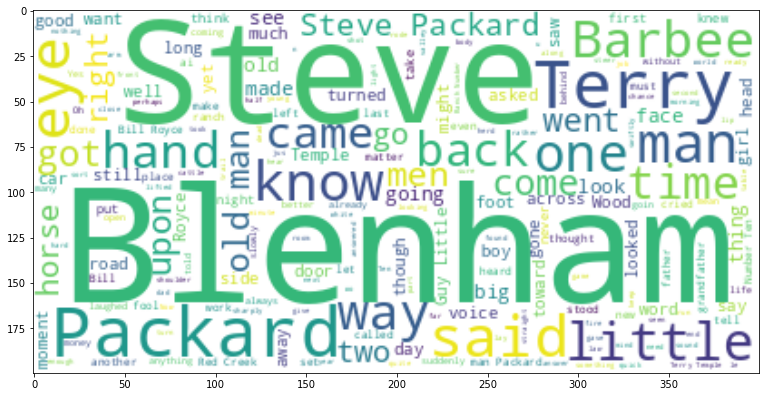

In [48]:
plt.figure(figsize=(13, 13))

plt.imshow(wordcloud, interpolation="bilinear")
plt.show()